In [1]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_ollama import ChatOllama
from langchain_huggingface import HuggingFaceEmbeddings  # HuggingFace嵌入

load_dotenv("../.env")

model = ChatOpenAI(
                    temperature=0,
                    max_tokens=4096,
                    presence_penalty=1.2,
                    # model='deepseek-chat',
                    # openai_api_key=os.getenv('DEEPSEEK_API_KEY'),
                    # openai_api_base="https://api.deepseek.com/v1",
                    model='gpt-4o-mini',
                    openai_api_key=os.getenv('CLOSEAI_API_KEY'),
                    openai_api_base="https://api.openai-proxy.org/v1",
                )

# model = ChatOllama(
#                     temperature=0,
#                     num_predict=4096,
#                     repeat_penalty=1.2,
#                     model="llama3.2:3b"
#                 )

embedding = HuggingFaceEmbeddings(
            model_name="../../../../Embedding/maidalun/bce-embedding-base_v1",
            model_kwargs={"device": "cuda",
                          "trust_remote_code": True},
            encode_kwargs={"normalize_embeddings": True},
        )

c:\Users\farben\anaconda3\envs\lclg\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define the graph

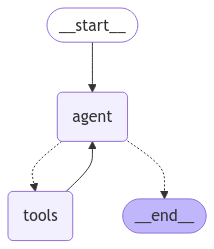

In [2]:
from typing import Literal
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.runnables import ConfigurableField
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent


@tool
def get_weather(city: Literal["nyc", "sf"]):
    """Use this to get weather information."""
    if city == "nyc":
        return "It might be cloudy in nyc"
    elif city == "sf":
        return "It's always sunny in sf"
    else:
        raise AssertionError("Unknown city")


tools = [get_weather]

graph = create_react_agent(model, tools)

graph

# Stream multiple

In [3]:
inputs = {"messages": [("human", "what's the weather in sf")]}
async for event, chunk in graph.astream(inputs, stream_mode=["updates", "debug"]):
    print(f"Receiving new event of type: {event}...")
    print(chunk)
    print("\n\n")

Receiving new event of type: debug...
{'type': 'task', 'timestamp': '2024-12-29T10:32:13.739228+00:00', 'step': 1, 'payload': {'id': '57b72499-7558-f66e-f96a-21683b2d39f8', 'name': 'agent', 'input': {'messages': [HumanMessage(content="what's the weather in sf", additional_kwargs={}, response_metadata={}, id='5c96df43-9ef0-40d6-8ef1-70370ca1182a')], 'is_last_step': False, 'remaining_steps': 24}, 'triggers': ['start:agent']}}



Receiving new event of type: updates...
{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_nSJABfac1fk0e8BY5PDAsgHC', 'function': {'arguments': '{"city":"sf"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 57, 'total_tokens': 72, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 